In [4]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
df = pd.read_csv("QRIS.csv")
df

,Komentar
0,QRIS membuat pembayaran menjadi mudah!
1,Saya senang bagaimana QRIS menyederhanakan tra...
2,QRIS adalah inovasi luar biasa untuk bisnis di...
3,"Penggunaan QRIS seringkali membingungkan, seri..."
4,Sistem QRIS terlalu lambat. Saya tidak suka.
...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...
96,Penggunaan QRIS membuat pembelian menjadi lebi...
97,QRIS ribet
98,Tidak jelas make QRIS


# Case Folding

In [10]:
# Define a function to convert text to lowercase
def lowercase(text):
    return text.lower()

# Apply the function to the 'Komentar' column and create a new 'clean_review' column
df['clean_text'] = df['Komentar'].apply(lowercase)

# Display the DataFrame with the 'clean_review' column
df

,Komentar,clean_text
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah!
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...
3,"Penggunaan QRIS seringkali membingungkan, seri...","penggunaan qris seringkali membingungkan, seri..."
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat. saya tidak suka.
...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...
97,QRIS ribet,qris ribet
98,Tidak jelas make QRIS,tidak jelas make qris


# Remove the emoji of the text.

In [11]:
# Define a function to remove emojis using a regex pattern
def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

# Apply the function to the 'Komentar' column and create a new 'clean_text' column
df['clean_text'] = df['clean_text'].apply(remove_emoji)
df

,Komentar,clean_text
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah!
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...
3,"Penggunaan QRIS seringkali membingungkan, seri...","penggunaan qris seringkali membingungkan, seri..."
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat. saya tidak suka.
...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...
97,QRIS ribet,qris ribet
98,Tidak jelas make QRIS,tidak jelas make qris


# Remove Hastagh

In [12]:
# Define a function to remove hashtags from the text
def remove_hashtag(review_text, default_replace=""):
    text_without_hashtags = re.sub(r'#\w+', default_replace, review_text)
    return text_without_hashtags

# Apply the function to the 'Komentar' column and create a new 'clean_text' column
df['clean_text'] = df['clean_text'].apply(remove_hashtag)
df

,Komentar,clean_text
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah!
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...
3,"Penggunaan QRIS seringkali membingungkan, seri...","penggunaan qris seringkali membingungkan, seri..."
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat. saya tidak suka.
...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...
97,QRIS ribet,qris ribet
98,Tidak jelas make QRIS,tidak jelas make qris


# Remove Punctuation and Number

In [13]:
# Define a function to remove numbers from the text
def remove_number(review_text, default_replace=" "):
    text_without_numbers = re.sub(r'\d+', default_replace, review_text)
    return text_without_numbers

# Define a function to remove punctuation from the text
def remove_punctuation(review_text, default_text=" "):
    list_punct = string.punctuation
    delete_punct = str.maketrans('', '', list_punct)
    new_review = review_text.translate(delete_punct)
    return new_review

# Define a function to remove superscripts from the text
def remove_superscript(review_text):
    superscript_pattern = re.compile("["u"\U00002070" 
                      u"\U000000B9"  
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"\U0000200D"
                      "]+", flags=re.UNICODE)
    return superscript_pattern.sub(r'', review_text)

# Apply the functions to the 'Komentar' column and create a new 'clean_text' column
df['clean_text'] = df['clean_text'].apply(remove_number)
df['clean_text'] = df['clean_text'].apply(remove_punctuation)
df['clean_text'] = df['clean_text'].apply(remove_superscript)
df

,Komentar,clean_text
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...
3,"Penggunaan QRIS seringkali membingungkan, seri...",penggunaan qris seringkali membingungkan serin...
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat saya tidak suka
...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...
97,QRIS ribet,qris ribet
98,Tidak jelas make QRIS,tidak jelas make qris


# Remove Words Repetition

Limiting Repeated Letters to Two: The code ensures that repeated letters within a word are limited to a maximum of two, preventing excessive repetition. For example, "Excelent workk!" becomes "Excellent work!"

Removing Repeated Words: The code removes repeated words in the text, ensuring that words with the same meaning but different spellings are represented only once. For example, "suka suka" becomes "suka."

In [14]:
# Define a function to limit repeated letters to two
def word_repetition(review_text):
    review = re.sub(r'(.)\1+', r'\1\1', review_text)
    return review

# Define a function to remove repeated words
def repetition(review_text):
    repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1', review_text, flags=re.IGNORECASE)
    return repeat

# Apply the functions to the 'Komentar' column and create a new 'clean_text' column
df['clean_text'] = df['clean_text'].apply(word_repetition)
df['clean_text'] = df['clean_text'].apply(repetition)
df

,Komentar,clean_text
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...
3,"Penggunaan QRIS seringkali membingungkan, seri...",penggunaan qris seringkali membingungkan serin...
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat saya tidak suka
...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...
97,QRIS ribet,qris ribet
98,Tidak jelas make QRIS,tidak jelas make qris


# Remove Whitespaces

In [15]:
# Define a function to remove extra whitespaces
def remove_extra_whitespaces(review_text):
    cleaned_text = re.sub(r'\s+', ' ', review_text)
    return cleaned_text.strip()  # Optional: Remove leading and trailing spaces

# Apply the function to the 'Komentar' column and create a new 'clean_text' column
df['clean_text'] = df['clean_text'].apply(remove_extra_whitespaces)
df

,Komentar,clean_text
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...
3,"Penggunaan QRIS seringkali membingungkan, seri...",penggunaan qris seringkali membingungkan serin...
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat saya tidak suka
...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...
97,QRIS ribet,qris ribet
98,Tidak jelas make QRIS,tidak jelas make qris


# Word Tokenization

Word tokenization is a fundamental natural language processing (NLP) task that involves splitting a text or a sentence into individual words or tokens. These tokens are the basic units that are used for various NLP operations, 

In [18]:
def word_token(review_text):
  return word_tokenize(review_text)

df['token'] = df['clean_text'].apply(lambda tokenize:word_token(str(tokenize)))


,Komentar,clean_text,token
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah,"[qris, membuat, pembayaran, menjadi, mudah]"
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...,"[saya, senang, bagaimana, qris, menyederhanaka..."
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...,"[qris, adalah, inovasi, luar, biasa, untuk, bi..."
3,"Penggunaan QRIS seringkali membingungkan, seri...",penggunaan qris seringkali membingungkan serin...,"[penggunaan, qris, seringkali, membingungkan, ..."
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat saya tidak suka,"[sistem, qris, terlalu, lambat, saya, tidak, s..."
...,...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...,"[qris, adalah, jawaban, bagi, mereka, yang, me..."
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...,"[penggunaan, qris, membuat, pembelian, menjadi..."
97,QRIS ribet,qris ribet,"[qris, ribet]"
98,Tidak jelas make QRIS,tidak jelas make qris,"[tidak, jelas, make, qris]"


# Wordcloud Vizualitation

In [19]:
review_all = []

for  in df['clean_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

qris
membuat
pembayaran
menjadi
mudah
saya
senang
bagaimana
qris
menyederhanakan
transaksi
qris
adalah
inovasi
luar
biasa
untuk
bisnis
di
indonesia
penggunaan
qris
seringkali
membingungkan
seringkali
tidak
berfungsi
dengan
baik
sistem
qris
terlalu
lambat
saya
tidak
suka
qris
tidak
dapat
diandalkan
dan
seringkali
bermasalah
saya
memiliki
pandangan
campuran
tentang
qris
sangat
nyaman
tetapi
kurang
dapat
diandalkan
adopsi
qris
di
indonesia
sungguh
mengesankan
saya
skeptis
tentang
keamanan
qris
qris
perlu
meningkatkan
dukungan
pelanggan
saya
memiliki
pengalaman
luar
biasa
ketika
menggunakan
qris
aplikasi
qris
sangat
userfriendly
dan
efisien
qris
telah
memudahkan
pembayaran
nontunai
saya
tidak
merasa
aman
dengan
keamanan
qris
qris
telah
merevolusi
pembayaran
digital
saya
berharap
qris
memiliki
lebih
banyak
fitur
dan
opsi
qris
adalah
langkah
yang
positif
bagi
bisnis
di
indonesia
saya
tidak
bisa
lagi
membayangkan
hidup
tanpa
qris
qris
mengalami
terlalu
banyak
masalah
teknis
upaya
pemerintah
d

In [21]:
#finding the "most frequently mentioned words" or "most commonly discussed words" by users.

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire comments:")
freq_dist

how many frequency distribution samples from an entire comments:


FreqDist({'qris': 100, 'saya': 33, 'lebih': 19, 'adalah': 17, 'di': 16, 'pembayaran': 14, 'untuk': 14, 'tidak': 14, 'dalam': 12, 'bisnis': 9, ...})

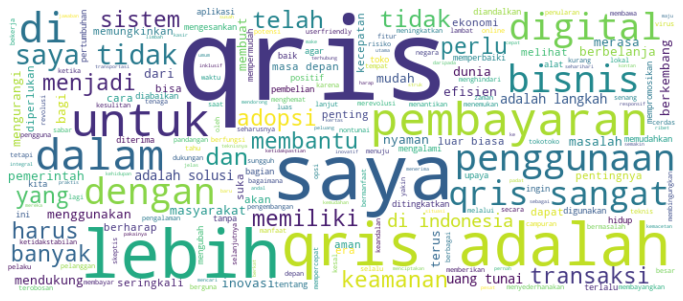

In [22]:
# WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
# Show most used words

common_review = freq_dist.most_common(100)
print(common_review)

[('qris', 100), ('saya', 33), ('lebih', 19), ('adalah', 17), ('di', 16), ('pembayaran', 14), ('untuk', 14), ('tidak', 14), ('dalam', 12), ('bisnis', 9), ('penggunaan', 9), ('dengan', 9), ('sangat', 9), ('digital', 9), ('dan', 6), ('telah', 6), ('menjadi', 5), ('transaksi', 5), ('indonesia', 5), ('sistem', 5), ('memiliki', 5), ('adopsi', 5), ('keamanan', 5), ('perlu', 5), ('banyak', 5), ('langkah', 5), ('yang', 5), ('solusi', 5), ('membantu', 5), ('uang', 5), ('tunai', 5), ('harus', 5), ('membuat', 4), ('mudah', 4), ('inovasi', 4), ('nyaman', 4), ('menggunakan', 4), ('efisien', 4), ('merasa', 4), ('bagi', 4), ('masalah', 4), ('pemerintah', 4), ('depan', 4), ('masyarakat', 4), ('dari', 4), ('berbelanja', 4), ('terus', 4), ('berkembang', 4), ('mendukung', 4), ('mengurangi', 4), ('dunia', 4), ('luar', 3), ('biasa', 3), ('seringkali', 3), ('suka', 3), ('dapat', 3), ('aman', 3), ('berharap', 3), ('bisa', 3), ('masa', 3), ('penting', 3), ('ekonomi', 3), ('era', 3), ('memungkinkan', 3), ('cara

In [25]:
# Insert the 500 sample into dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,qris,100
1,saya,33
2,lebih,19
3,adalah,17
4,di,16
...,...,...
74,mengesankan,2
73,tentang,2
72,diandalkan,2
70,baik,2


In [27]:
# sort a sample of words based on their frequency of occurrence in descending order and then select the top 15 most frequent words. 

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]
top15

,words,count
0,qris,100
1,saya,33
2,lebih,19
3,adalah,17
4,di,16
5,pembayaran,14
6,untuk,14
7,tidak,14
8,dalam,12
9,bisnis,9


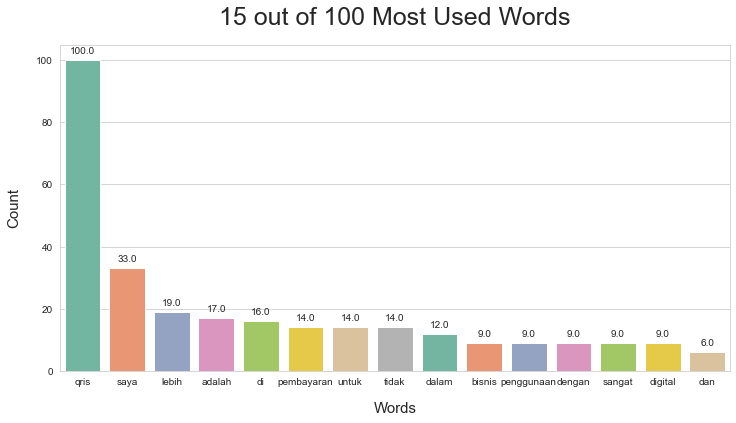

In [32]:
#visualize

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 out of 100 Most Used Words", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

# Remove Stopwords in Bahasa

Stopwords are common words that are frequently filtered out or excluded from text data during text analysis and natural language processing (NLP) tasks. Similar to English, these stopwords are considered to be of little value in understanding the content of the text because they do not carry significant meaning on their own and are primarily used for grammatical structure.

Examples of stopwords in Bahasa Indonesia include words like "dan" (and), "atau" (or), "saya" (I), "kamu" (you), "di" (in, at), "dari" (from), "untuk" (for), and many others.

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data] 

True

In [34]:
#Showing Indonesian stopword
indonesian_stop = stopwords.words('indonesian')

print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [35]:
# Insert Indonesian stopword to a dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [36]:
# Save it into xlsx format

stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

In [ ]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)
  
  return tokenize

df['stop_text'] = df['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [40]:
df

,Komentar,clean_text,token,stop_text
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah,"[qris, membuat, pembayaran, menjadi, mudah]","[qris, pembayaran, mudah]"
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...,"[saya, senang, bagaimana, qris, menyederhanaka...","[senang, qris, menyederhanakan, transaksi]"
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...,"[qris, adalah, inovasi, luar, biasa, untuk, bi...","[qris, inovasi, bisnis, indonesia]"
3,"Penggunaan QRIS seringkali membingungkan, seri...",penggunaan qris seringkali membingungkan serin...,"[penggunaan, qris, seringkali, membingungkan, ...","[penggunaan, qris, seringkali, membingungkan, ..."
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat saya tidak suka,"[sistem, qris, terlalu, lambat, saya, tidak, s...","[sistem, qris, lambat, suka]"
...,...,...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...,"[qris, adalah, jawaban, bagi, mereka, yang, me...","[qris, mencari, kecepatan]"
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...,"[penggunaan, qris, membuat, pembelian, menjadi...","[penggunaan, qris, pembelian, praktis]"
97,QRIS ribet,qris ribet,"[qris, ribet]","[qris, ribet]"
98,Tidak jelas make QRIS,tidak jelas make qris,"[tidak, jelas, make, qris]","[make, qris]"


# Stemming

Stemming is a text normalization technique used to reduce words to their root or base form. The goal of stemming is to simplify words by removing prefixes or suffixes to convert them into a common, basic form. This can help improve the efficiency of text analysis and information retrieval for Bahasa Indonesia.

In [41]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

df['stem_text'] = df['stop_text'].apply(lambda stem:back_to_root(stem))
df

,Komentar,clean_text,token,stop_text,stem_text
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah,"[qris, membuat, pembayaran, menjadi, mudah]","[qris, pembayaran, mudah]",qris bayar mudah
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...,"[saya, senang, bagaimana, qris, menyederhanaka...","[senang, qris, menyederhanakan, transaksi]",senang qris sederhana transaksi
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...,"[qris, adalah, inovasi, luar, biasa, untuk, bi...","[qris, inovasi, bisnis, indonesia]",qris inovasi bisnis indonesia
3,"Penggunaan QRIS seringkali membingungkan, seri...",penggunaan qris seringkali membingungkan serin...,"[penggunaan, qris, seringkali, membingungkan, ...","[penggunaan, qris, seringkali, membingungkan, ...",guna qris seringkali bingung seringkali fungsi
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat saya tidak suka,"[sistem, qris, terlalu, lambat, saya, tidak, s...","[sistem, qris, lambat, suka]",sistem qris lambat suka
...,...,...,...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...,"[qris, adalah, jawaban, bagi, mereka, yang, me...","[qris, mencari, kecepatan]",qris cari cepat
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...,"[penggunaan, qris, membuat, pembelian, menjadi...","[penggunaan, qris, pembelian, praktis]",guna qris beli praktis
97,QRIS ribet,qris ribet,"[qris, ribet]","[qris, ribet]",qris ribet
98,Tidak jelas make QRIS,tidak jelas make qris,"[tidak, jelas, make, qris]","[make, qris]",make qris


# Data Labeling

In [45]:
#Read the positive and negative Lexicon
import csv

lexicon_positive = dict()
with open('Dataset/lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open('Dataset/lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [46]:
# Create a function named sentiment_analysis_lexicon_indonesia which contains a for loop and if
# conditions to label each comments

def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'
  
  return score, polarity

In [48]:
# Conduct functional tests on dummy sentences.

string = "qris ini sangat bagus bagus dan jujur"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-3, 'negatif')

In [51]:
#Separate the sentences in the stem_review column and then apply
#the sentiment_analysis_lexicon_indonesia function to that column

df['prepos_text'] = df.stem_text.str.split()

In [52]:
results = df['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

positif    67
negatif    21
netral     12
Name: polarity, dtype: int64


In [53]:
df

,Komentar,clean_text,token,stop_text,stem_text,prepos_text,polarity_score,polarity
0,QRIS membuat pembayaran menjadi mudah!,qris membuat pembayaran menjadi mudah,"[qris, membuat, pembayaran, menjadi, mudah]","[qris, pembayaran, mudah]",qris bayar mudah,"[qris, bayar, mudah]",1,positif
1,Saya senang bagaimana QRIS menyederhanakan tra...,saya senang bagaimana qris menyederhanakan tra...,"[saya, senang, bagaimana, qris, menyederhanaka...","[senang, qris, menyederhanakan, transaksi]",senang qris sederhana transaksi,"[senang, qris, sederhana, transaksi]",3,positif
2,QRIS adalah inovasi luar biasa untuk bisnis di...,qris adalah inovasi luar biasa untuk bisnis di...,"[qris, adalah, inovasi, luar, biasa, untuk, bi...","[qris, inovasi, bisnis, indonesia]",qris inovasi bisnis indonesia,"[qris, inovasi, bisnis, indonesia]",7,positif
3,"Penggunaan QRIS seringkali membingungkan, seri...",penggunaan qris seringkali membingungkan serin...,"[penggunaan, qris, seringkali, membingungkan, ...","[penggunaan, qris, seringkali, membingungkan, ...",guna qris seringkali bingung seringkali fungsi,"[guna, qris, seringkali, bingung, seringkali, ...",1,positif
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat saya tidak suka,"[sistem, qris, terlalu, lambat, saya, tidak, s...","[sistem, qris, lambat, suka]",sistem qris lambat suka,"[sistem, qris, lambat, suka]",-1,negatif
...,...,...,...,...,...,...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,qris adalah jawaban bagi mereka yang mencari k...,"[qris, adalah, jawaban, bagi, mereka, yang, me...","[qris, mencari, kecepatan]",qris cari cepat,"[qris, cari, cepat]",-3,negatif
96,Penggunaan QRIS membuat pembelian menjadi lebi...,penggunaan qris membuat pembelian menjadi lebi...,"[penggunaan, qris, membuat, pembelian, menjadi...","[penggunaan, qris, pembelian, praktis]",guna qris beli praktis,"[guna, qris, beli, praktis]",4,positif
97,QRIS ribet,qris ribet,"[qris, ribet]","[qris, ribet]",qris ribet,"[qris, ribet]",-4,negatif
98,Tidak jelas make QRIS,tidak jelas make qris,"[tidak, jelas, make, qris]","[make, qris]",make qris,"[make, qris]",0,netral


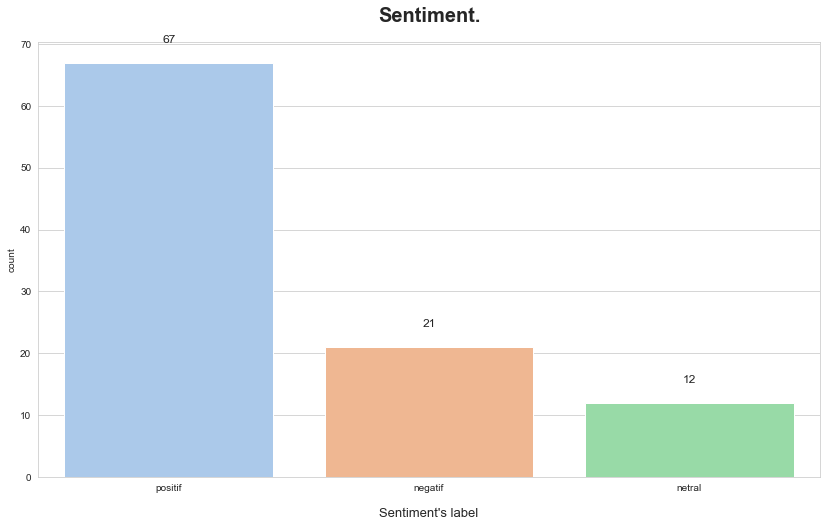

In [55]:
# Visualize

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=df, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Sentiment.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

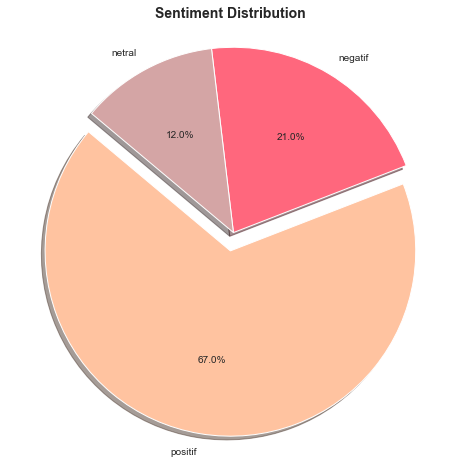

In [59]:
# Define data for the pie chart
# Get the value counts of sentiment labels in your DataFrame
sentiment_counts = df['polarity'].value_counts().to_dict()
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['#FFC3A0', '#FF677D', '#D4A5A5']  # You can customize the colors
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Sentiment Distribution", fontsize=14, fontweight='bold')
plt.show()

# Wordcloud for Positive Sentiment

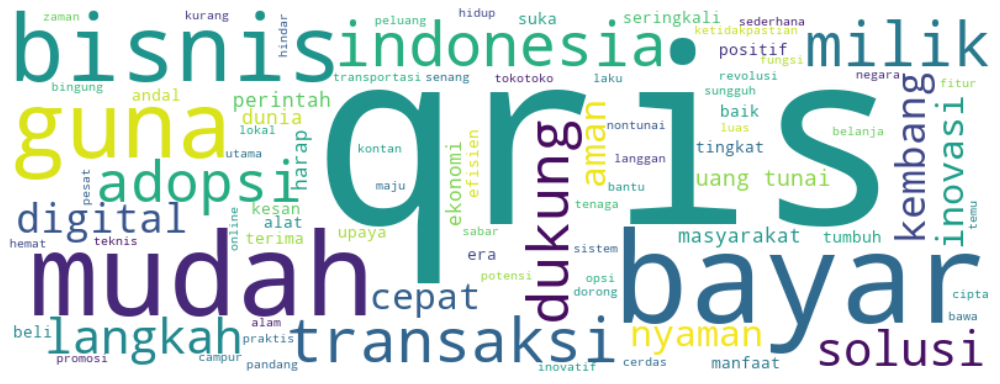

In [62]:
sentiment_pos = ' '.join([text for text in df['stem_text'][df['polarity'] == 'positif']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

# Wordcloud for Negative Sentiment

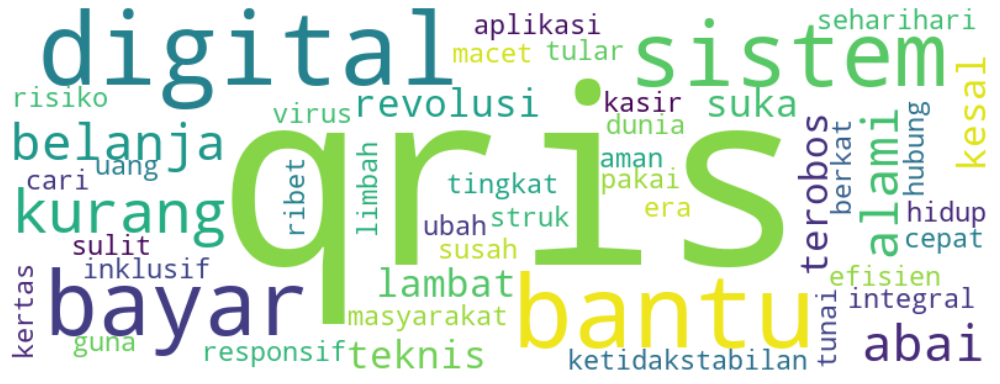

In [63]:
sentiment_pos = ' '.join([text for text in df['stem_text'][df['polarity'] == 'negatif']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

# Wordcloud for Netral Sentiment

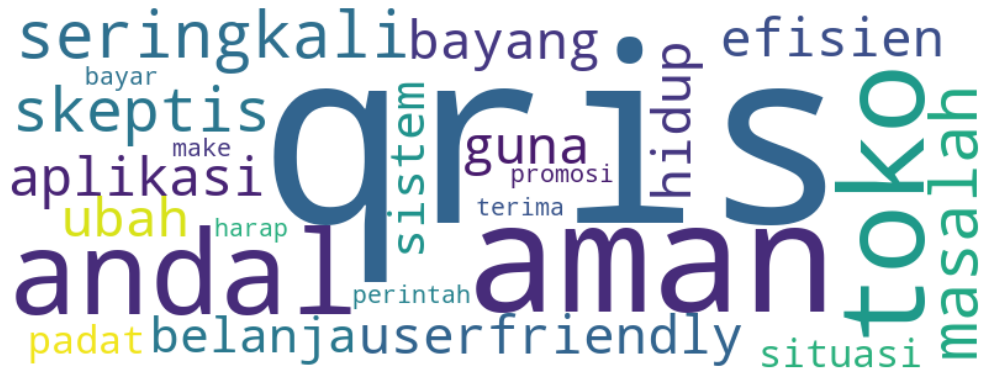

In [64]:
sentiment_pos = ' '.join([text for text in df['stem_text'][df['polarity'] == 'netral']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

In [68]:
df[df['polarity'] == 'negatif']

,Komentar,clean_text,token,stop_text,stem_text,prepos_text,polarity_score,polarity
4,Sistem QRIS terlalu lambat. Saya tidak suka.,sistem qris terlalu lambat saya tidak suka,"[sistem, qris, terlalu, lambat, saya, tidak, s...","[sistem, qris, lambat, suka]",sistem qris lambat suka,"[sistem, qris, lambat, suka]",-1,negatif
14,QRIS telah merevolusi pembayaran digital.,qris telah merevolusi pembayaran digital,"[qris, telah, merevolusi, pembayaran, digital]","[qris, merevolusi, pembayaran, digital]",qris revolusi bayar digital,"[qris, revolusi, bayar, digital]",-2,negatif
18,QRIS mengalami terlalu banyak masalah teknis.,qris mengalami terlalu banyak masalah teknis,"[qris, mengalami, terlalu, banyak, masalah, te...","[qris, mengalami, teknis]",qris alami teknis,"[qris, alami, teknis]",-3,negatif
20,QRIS adalah terobosan dalam pembayaran digital.,qris adalah terobosan dalam pembayaran digital,"[qris, adalah, terobosan, dalam, pembayaran, d...","[qris, terobosan, pembayaran, digital]",qris terobos bayar digital,"[qris, terobos, bayar, digital]",-2,negatif
25,Saya kesal dengan ketidakstabilan QRIS.,saya kesal dengan ketidakstabilan qris,"[saya, kesal, dengan, ketidakstabilan, qris]","[kesal, ketidakstabilan, qris]",kesal ketidakstabilan qris,"[kesal, ketidakstabilan, qris]",-1,negatif
32,Saya mengalami kesulitan saat menggunakan QRIS.,saya mengalami kesulitan saat menggunakan qris,"[saya, mengalami, kesulitan, saat, menggunakan...","[mengalami, kesulitan, qris]",alami sulit qris,"[alami, sulit, qris]",-3,negatif
34,QRIS telah mengubah cara saya berbelanja.,qris telah mengubah cara saya berbelanja,"[qris, telah, mengubah, cara, saya, berbelanja]","[qris, mengubah, berbelanja]",qris ubah belanja,"[qris, ubah, belanja]",-1,negatif
48,Aplikasi QRIS sangat efisien dalam berbelanja.,aplikasi qris sangat efisien dalam berbelanja,"[aplikasi, qris, sangat, efisien, dalam, berbe...","[aplikasi, qris, efisien, berbelanja]",aplikasi qris efisien belanja,"[aplikasi, qris, efisien, belanja]",-1,negatif
49,Sistem QRIS saya selalu bekerja dengan baik.,sistem qris saya selalu bekerja dengan baik,"[sistem, qris, saya, selalu, bekerja, dengan, ...","[sistem, qris]",sistem qris,"[sistem, qris]",-4,negatif
50,QRIS membantu mengurangi risiko penularan viru...,qris membantu mengurangi risiko penularan viru...,"[qris, membantu, mengurangi, risiko, penularan...","[qris, membantu, mengurangi, risiko, penularan...",qris bantu kurang risiko tular virus uang tunai,"[qris, bantu, kurang, risiko, tular, virus, ua...",-8,negatif


In [71]:
df[df['polarity'] == 'netral']

,Komentar,clean_text,token,stop_text,stem_text,prepos_text,polarity_score,polarity
5,QRIS tidak dapat diandalkan dan seringkali ber...,qris tidak dapat diandalkan dan seringkali ber...,"[qris, tidak, dapat, diandalkan, dan, seringka...","[qris, diandalkan, seringkali, bermasalah]",qris andal seringkali masalah,"[qris, andal, seringkali, masalah]",0,netral
8,Saya skeptis tentang keamanan QRIS.,saya skeptis tentang keamanan qris,"[saya, skeptis, tentang, keamanan, qris]","[skeptis, keamanan, qris]",skeptis aman qris,"[skeptis, aman, qris]",0,netral
11,Aplikasi QRIS sangat user-friendly dan efisien.,aplikasi qris sangat userfriendly dan efisien,"[aplikasi, qris, sangat, userfriendly, dan, ef...","[aplikasi, qris, userfriendly, efisien]",aplikasi qris userfriendly efisien,"[aplikasi, qris, userfriendly, efisien]",0,netral
13,Saya tidak merasa aman dengan keamanan QRIS.,saya tidak merasa aman dengan keamanan qris,"[saya, tidak, merasa, aman, dengan, keamanan, ...","[aman, keamanan, qris]",aman aman qris,"[aman, aman, qris]",0,netral
17,Saya tidak bisa lagi membayangkan hidup tanpa ...,saya tidak bisa lagi membayangkan hidup tanpa ...,"[saya, tidak, bisa, lagi, membayangkan, hidup,...","[membayangkan, hidup, qris]",bayang hidup qris,"[bayang, hidup, qris]",0,netral
35,Saya tidak tahu cara menggunakan QRIS.,saya tidak tahu cara menggunakan qris,"[saya, tidak, tahu, cara, menggunakan, qris]",[qris],qris,[qris],0,netral
72,Penggunaan QRIS telah mengubah cara saya berbe...,penggunaan qris telah mengubah cara saya berbe...,"[penggunaan, qris, telah, mengubah, cara, saya...","[penggunaan, qris, mengubah, berbelanja]",guna qris ubah belanja,"[guna, qris, ubah, belanja]",0,netral
81,Saya ingin melihat QRIS digunakan di lebih ban...,saya ingin melihat qris digunakan di lebih ban...,"[saya, ingin, melihat, qris, digunakan, di, le...","[qris, toko]",qris toko,"[qris, toko]",0,netral
83,Sistem QRIS harus lebih andal dalam situasi pa...,sistem qris harus lebih andal dalam situasi padat,"[sistem, qris, harus, lebih, andal, dalam, sit...","[sistem, qris, andal, situasi, padat]",sistem qris andal situasi padat,"[sistem, qris, andal, situasi, padat]",0,netral
86,Pemerintah harus terus mempromosikan QRIS.,pemerintah harus terus mempromosikan qris,"[pemerintah, harus, terus, mempromosikan, qris]","[pemerintah, mempromosikan, qris]",perintah promosi qris,"[perintah, promosi, qris]",0,netral
